<a href="https://colab.research.google.com/github/hashiramauchiha/Machine-Learning-Projects/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price Prediction Using Linear Regression**

In [166]:
#Importing Quandl
!pip install quandl

In [167]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import quandl
from pandas import DataFrame
from pandas import concat
import numpy

In [168]:
quandl.ApiConfig.api_key = "fxquYZXDo_qkY7AgGy_C"

In [169]:
dataframe_raw = quandl.get("EOD/AAPL")

In [170]:
df = dataframe_raw.copy(deep=True)

In [171]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [172]:
(df[['Split']]==7.0).value_counts()

Split
False    1089
True        1
dtype: int64

**Feature Engineering**

Generating New feature From exiating feature.

In [173]:
#High Low Pecentage : df['HL_PTC']=df['Adj.High']-df['Adj.Low']/df['Adj.Close']*100.0
df['HL_PCT']=df['Adj_High']-df['Adj_Low']/df['Adj_Close']*100.0
#Percentage Change : df['PCT_change']=df['Adj.Close']-df['Adj.Open']/df['Adj.Open']*100.0
df['PCT_change']=df['Adj_Close']-df['Adj_Open']/df['Adj_Open']*100.0

In [174]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,-83.891027,-84.523528
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,-83.607362,-84.203247
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,-83.811129,-84.311612
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,-82.521513,-84.218167
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,-83.379463,-83.966339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,-57.135411,-57.898354
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,-57.507347,-57.898354
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,-58.227595,-58.966472


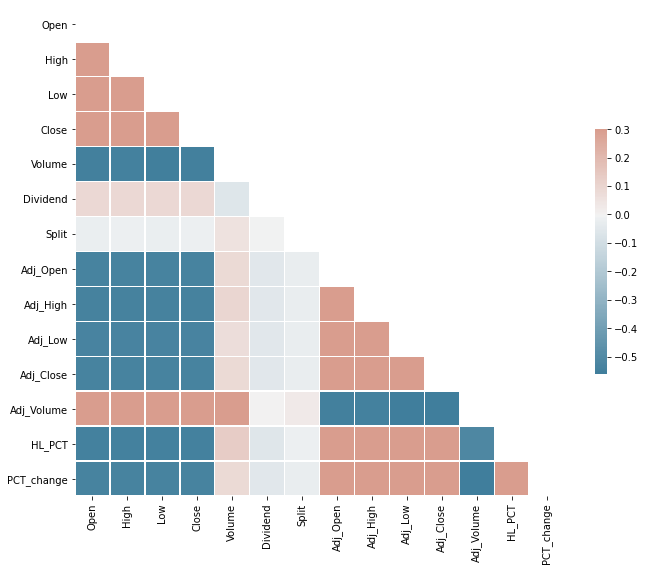

In [175]:
#df.corr (Checking the co-relation)
import seaborn as sns
corr = df.corr()

mask = np.triu(np.ones_like(corr,dtype=bool))

f , ax = plt.subplots(figsize=(11,9))

cmap= sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={"shrink":.5})

**Fearure Selection:**

In [176]:
#df = df[["Adj_Close","Adj_Volume","HL_PCT","PCT_change"]]
df = df[["Adj_Open","Adj_High","Adj_Low","Adj_Close","Adj_Volume","HL_PCT","PCT_change"]]

In [177]:
df.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,
2013-09-03,15.619650,15.857223,15.437510,15.476472,331928800.0,-83.891027,-84.523528
2013-09-04,15.824280,15.909173,15.720381,15.796753,345032800.0,-83.607362,-84.203247
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0,-83.811129,-84.311612
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0,-82.521513,-84.218167
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0,-83.379463,-83.966339


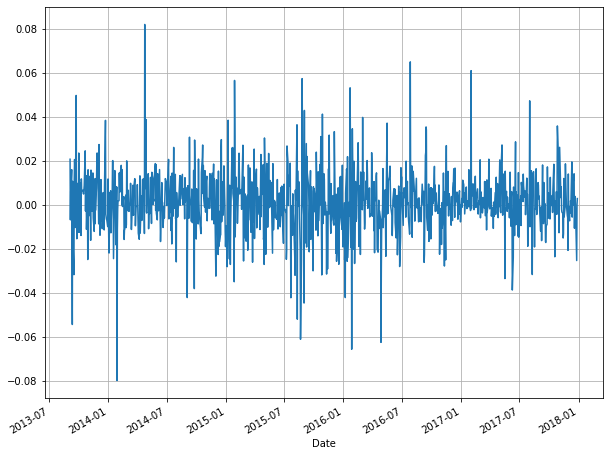

In [178]:
df['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True) #which is also  PCT_change column

In [179]:
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Open,1.000000,0.999528,0.999416,0.998987,-0.549990,0.990545,0.998987
Adj_High,0.999528,1.000000,0.999278,0.999526,-0.544404,0.993568,0.999526
Adj_Low,0.999416,0.999278,1.000000,0.999558,-0.560073,0.990297,0.999558
Adj_Close,0.998987,0.999526,0.999558,1.000000,-0.553474,0.993843,1.000000
Adj_Volume,-0.549990,-0.544404,-0.560073,-0.553474,1.000000,-0.514419,-0.553474
HL_PCT,0.990545,0.993568,0.990297,0.993843,-0.514419,1.000000,0.993843
PCT_change,0.998987,0.999526,0.999558,1.000000,-0.553474,0.993843,1.000000


**Preparing Input Output Features for model Training**

In [180]:
df.shape

(1090, 7)

In [181]:
label= df['Adj_Close'].shift(-10)


In [182]:
label.isna().sum()
label.shape

(1090,)

In [183]:
label.dropna(inplace=True)
x = df[['Adj_Volume','HL_PCT','PCT_change']]
x.shape

(1090, 3)

In [184]:
y = np.array(label)
y.shape

(1080,)

In [185]:
x_lately = x[-10:]
x = x[:-10]
print("Shape of x after removing x_lately: ",x.shape)
print("Shape of x_lately: ",x_lately.shape)


Shape of x after removing x_lately:  (1080, 3)
Shape of x_lately:  (10, 3)


In [186]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=41)

norm=MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
x_lately = norm.transform(x_lately)

In [187]:
reg = LinearRegression()
reg.fit(X_test,y_test)
score=reg.score(X_test,y_test)

print("Estimated Intercept Coefficient: ",reg.intercept_)
print("Number of Co-efficient: ",len(reg.coef_))

Estimated Intercept Coefficient:  14.754551196197266
Number of Co-efficient:  3


In [188]:
coefdf=pd.DataFrame(zip(x.columns,reg.coef_),columns=['features','estimatedCoefficient'])
coefdf

,features,estimatedCoefficient
0,Adj_Volume,-0.336262
1,HL_PCT,-5.396815
2,PCT_change,33.076364


In [189]:
forcast=[]
forecast  = reg.predict(x_lately)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
print("LinearReg Score: ",score)
print(forecast)

MSE:  1.4996935555998707
LinearReg Score:  0.9660189162242764
[41.80129744 42.12855917 42.70402805 42.36760926 42.24735152 42.43319427
 42.50883961 41.35153683 41.40671238 41.53444215]


**FOR UNIVARIATE**

In [190]:

def series_to_supervised(data, lag=1, forc=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is pandas.core.frame.DataFrame else data.shape[0]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(lag, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, forc):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [191]:
value = df[['Adj_Close']]
type(value)

pandas.core.frame.DataFrame

In [192]:
newdf = series_to_supervised(value,0,2,dropnan=True) #Change it to true while fitting model
newdf

,var1(t),var1(t+1)
Date,,
2013-09-03,15.476472,15.796753
2013-09-04,15.796753,15.688388
2013-09-05,15.688388,15.781833
2013-09-06,15.781833,16.033661
2013-09-09,16.033661,15.668432
...,...,...
2017-12-20,41.942872,42.101646
2017-12-21,42.101646,42.101646
2017-12-22,42.101646,41.033528


In [193]:
y=np.array(newdf['var1(t+1)'])
x=np.array(newdf['var1(t)'])

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=41)
X_train=X_train.reshape(-1,1) #As there is only one column in the array
X_test=X_test.reshape(-1,1)

norm=MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

reg = LinearRegression()
reg.fit(X_train,y_train)
score=reg.score(X_test,y_test)

forecast=[]
y_pred= reg.predict(X_test)

mse= mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
print("Linear Score: ",score)


MSE:  0.1487731092336786
Linear Score:  0.9965450347139894


**FOR MULTIVARIATE**

A Multivariate tume Series refers to the set of observation over timr of several variables and not one

In [196]:

def series_to_supervised(data, lag=1, forc=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is numpy.ndarray else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(lag, 0, -1):  #4,3,2,1 except 0
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, forc):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#temp = df[['Adj_Close','Adj_Volume','HL_PCT',"PCT_change"]]
temp =  df[["Adj_Close","Adj_Volume","Adj_Open","Adj_High","Adj_Low","HL_PCT","PCT_change"]]
print(temp)
data = series_to_supervised(temp,0,2,dropnan=True)
data

            Adj_Close   Adj_Volume   Adj_Open  ...    Adj_Low     HL_PCT  PCT_change
Date                                           ...                                  
2013-09-03  15.476472  331928800.0  15.619650  ...  15.437510 -83.891027  -84.523528
2013-09-04  15.796753  345032800.0  15.824280  ...  15.720381 -83.607362  -84.203247
2013-09-05  15.688388  236367600.0  15.846136  ...  15.636755 -83.811129  -84.311612
2013-09-06  15.781833  359525600.0  15.788802  ...  15.519869 -82.521513  -84.218167
2013-09-09  16.033661  340687200.0  15.996600  ...  15.948451 -83.379463  -83.966339
...               ...          ...        ...  ...        ...        ...         ...
2017-12-21  42.101646   83799584.0  41.899570  ...  41.882730 -57.135411  -57.898354
2017-12-22  42.101646   65397776.0  42.022259  ...  41.978957 -57.507347  -57.898354
2017-12-26  41.033528  132742144.0  41.088858  ...  40.819183 -58.227595  -58.966472
2017-12-27  41.040745   85992852.0  40.920461  ...  40.826640 -58

,var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
Date,,,,,,,,,,,,,,
2013-09-03,15.476472,331928800.0,15.619650,15.857223,15.437510,-83.891027,-84.523528,15.796753,345032800.0,15.824280,15.909173,15.720381,-83.607362,-84.203247
2013-09-04,15.796753,345032800.0,15.824280,15.909173,15.720381,-83.607362,-84.203247,15.688388,236367600.0,15.846136,15.859757,15.636755,-83.811129,-84.311612
2013-09-05,15.688388,236367600.0,15.846136,15.859757,15.636755,-83.811129,-84.311612,15.781833,359525600.0,15.788802,15.818578,15.519869,-82.521513,-84.218167
2013-09-06,15.781833,359525600.0,15.788802,15.818578,15.519869,-82.521513,-84.218167,16.033661,340687200.0,15.996600,16.089095,15.948451,-83.379463,-83.966339
2013-09-09,16.033661,340687200.0,15.996600,16.089095,15.948451,-83.379463,-83.966339,15.668432,743195600.0,16.034611,16.074207,15.505615,-82.886654,-84.331568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-20,41.942872,93902596.0,42.067966,42.200278,41.678248,-57.168807,-58.057128,42.101646,83799584.0,41.899570,42.344619,41.882730,-57.135411,-57.898354
2017-12-21,42.101646,83799584.0,41.899570,42.344619,41.882730,-57.135411,-57.898354,42.101646,65397776.0,42.022259,42.201241,41.978957,-57.507347,-57.898354
2017-12-22,42.101646,65397776.0,42.022259,42.201241,41.978957,-57.507347,-57.898354,41.033528,132742144.0,41.088858,41.250038,40.819183,-58.227595,-58.966472


In [197]:
y=data['var1(t+1)'] #Shiftedc Adj_Close column
x=data.drop(['var1(t+1)'],axis=1)

In [198]:
X_train,X_test, y_train, y_test = train_test_split (x,y, test_size=0.3,random_state=41)

norm = MinMaxScaler().fit(X_train)
X_train=norm.transform(X_train)
X_test=norm.transform(X_test)
X_lately=x[-200:]
X_lately=norm.transform(X_lately)
X_train.shape  

(762, 13)

In [201]:
reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_test,y_test)

forecast = []
forecast = reg.predict(X_lately)
y_pred =reg.predict(X_test)

mse =  mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
print("LinearReg Score: ",score)
print(forecast.shape)

MSE:  3.620557940537292e-29
LinearReg Score:  1.0
(200,)


(1090, 7)
(200, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


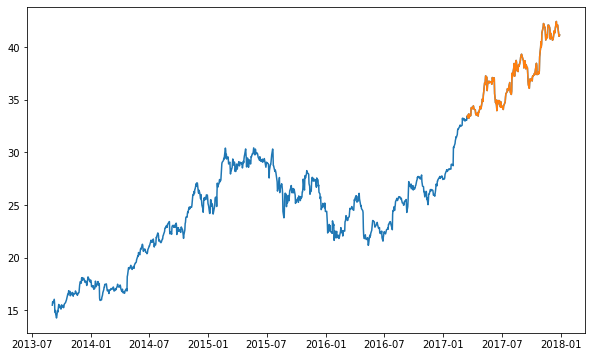

In [202]:
full_data = df[-1090:] #1090
print(full_data.shape)
pred_data=df[-200:]
pred_data['Predictions']=forecast
print(pred_data.shape)
plt.figure(figsize=(10,6))

plt.plot(full_data[['Adj_Close']])
plt.plot(pred_data[['Predictions']])

# Thank You :)